In [ ]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:10<00:00, 162MB/s]
100% 1.06G/1.06G [00:11<00:00, 104MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [17]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [18]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [19]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [20]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# flatten
model.add(Flatten())

# ANN
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [22]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 66s 100ms/step - loss: 1.0529 - accuracy: 0.6084 - val_loss: 0.6650 - val_accuracy: 0.6156
Epoch 2/10
625/625 [==============================] - 63s 101ms/step - loss: 0.5663 - accuracy: 0.7169 - val_loss: 0.7008 - val_accuracy: 0.6362
Epoch 3/10
625/625 [==============================] - 61s 97ms/step - loss: 0.4687 - accuracy: 0.7794 - val_loss: 0.4616 - val_accuracy: 0.7874
Epoch 4/10
625/625 [==============================] - 63s 99ms/step - loss: 0.3996 - accuracy: 0.8224 - val_loss: 0.7468 - val_accuracy: 0.6666
Epoch 5/10
625/625 [==============================] - 63s 100ms/step - loss: 0.3389 - accuracy: 0.8535 - val_loss: 1.9803 - val_accuracy: 0.6020
Epoch 6/10
625/625 [==============================] - 62s 98ms/step - loss: 0.2605 - accuracy: 0.8889 - val_loss: 1.3067 - val_accuracy: 0.7034
Epoch 7/10
625/625 [==============================] - 62s 99ms/step - loss: 0.1877 - accuracy: 0.9258 - val_loss: 0.9278 - val_accura

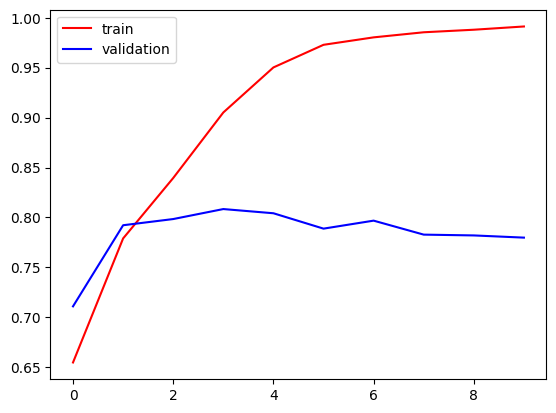

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

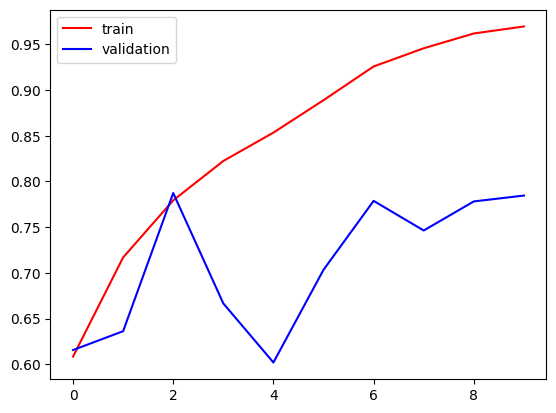

In [24]:
# after Droupout and batch normalize
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

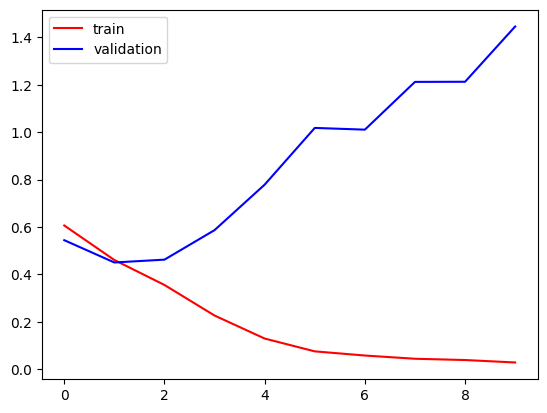

In [15]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

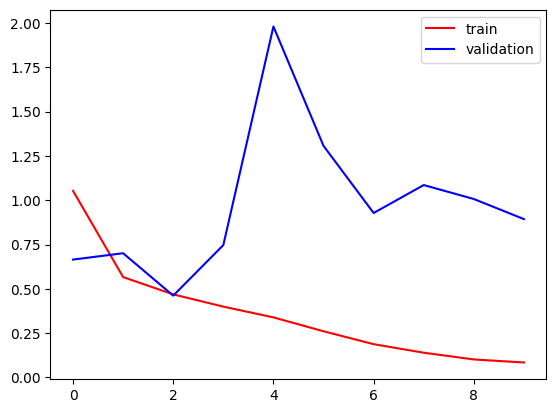

In [25]:
## after Droupout and batch normalize
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting

# Add more data
# Data Augmentation // RNN
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [26]:
import cv2

In [27]:
test_img = cv2.imread('/content/Cat.jpg')

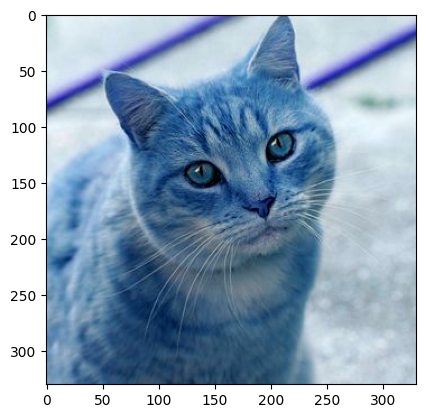

In [28]:
plt.imshow(test_img)

In [29]:
test_img.shape

(330, 330, 3)

In [30]:
test_img = cv2.resize(test_img,(256,256))

In [31]:
test_input = test_img.reshape((1,256,256,3))

In [32]:
model.predict(test_input)

1/1 [==============================] - 0s 247ms/step


array([[0.]], dtype=float32)

Dog

In [33]:
test_img = cv2.imread('/content/dog.jpg')

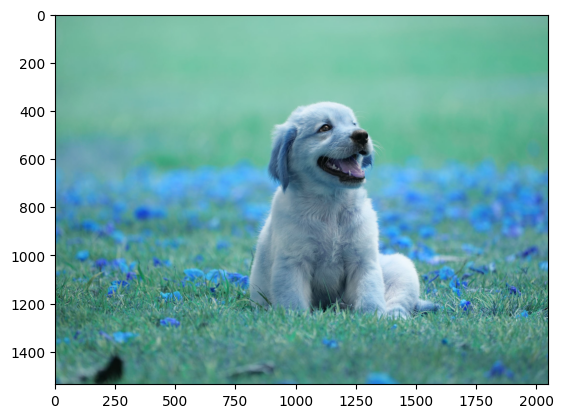

In [34]:
plt.imshow(test_img)

In [35]:
test_img.shape

(1536, 2048, 3)

In [36]:
test_img = cv2.resize(test_img,(256,256))

In [37]:
model.predict(test_input)

1/1 [==============================] - 0s 23ms/step


array([[0.]], dtype=float32)